# Steps

1.   Clean/Pre-Process Data.
2.   If data is one file, decide on how to use the records for train/testing.
3.   **Tokenize/Transform the train data** into BoW (Bag Of Words); vocabulary, matrix.
4.   **Build model (classifier) using train data** BoW matrix & Train labels.
5.   Apply our model from prior step to test data --> predict labels of test records.
6.   **Calculate any metrics** (accuracy, precision, recall, error-rate).

---
# For PDF Submission

## Half Page Description for Each of the (2) Datasets (200 or so words)

*   What are we trying to predict here? what do the class labels 0 and 1 represent? (see the Page above for my copy of the description of each dataset, just write 1-2 sentence summary for each dataset).
*   How many records in each file (train vs dev)?
*   How many records for each class label in each file (train vs dev)?
*   The number of unique terms or tokens in each file (train vs dev). For this you can use the scikit-learn code we have already used for vectorizers, see the previous notebooks. There are other ways to do this and of course feel free to google or use other tools to find out. This particular part is only worth up to 2 points out of 10.






# **Project 1 Final Evaluation [Dr. K Review Here]**

## **Corona Dataset**

In [ ]:
import pandas as pd
import numpy as np

## When needed
import re

## GitHub Raw files.

# Corona Train CSV File
corona_train = pd.read_csv('https://raw.githubusercontent.com/cs124/pa2-naive-bayes/refs/heads/main/data/coronavirus/train.csv', sep='|', names=['Text', 'Target'])

# Corona Test CSV File
corona_test = pd.read_csv('https://raw.githubusercontent.com/cs124/pa2-naive-bayes/refs/heads/main/data/coronavirus/dev.csv', sep='|', names=['Text', 'Target'])

### **Corona Multinomial NB--> TF-IDF Vectorizer**

In [ ]:
# Testing
corona_train = corona_train.drop(index=0)
corona_train = corona_train[0:15000]

In [ ]:
corona_test= corona_test.drop(index=0)

In [ ]:
# Checking Labels
label_groups = corona_train['Target'].groupby(corona_train['Target'])
label_groups.count()

,Target
Target,
0,7397
1,7603


In [ ]:
from sklearn.model_selection import train_test_split
## TF-IDF Training
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    corona_test['Text'],
                                                    corona_test['Target'],
                                                    test_size=0.2,
                                                    random_state=42
                                                   )

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF Vectorizer Processing
vectorize = TfidfVectorizer()
X_train_tfidf = vectorize.fit_transform(X_train).toarray()
X_test_tfidf = vectorize.transform(X_test).toarray()

In [ ]:
# Training our First Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tfidf, Y_train)


# Test Results
Y_pred = model.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Class report for First Bayes Model (1)
print(classification_report(Y_test,
                            Y_pred,
                            digits=4,
                            target_names=['Negative',
                                          'Positive']))

              precision    recall  f1-score   support

    Negative     0.7263    0.8502    0.7834      1008
    Positive     0.8159    0.6744    0.7384       992

    accuracy                         0.7630      2000
   macro avg     0.7711    0.7623    0.7609      2000
weighted avg     0.7707    0.7630    0.7611      2000



### **Corona Multinomial NB--> Count Vectorizer**

In [ ]:
# Random testing
label = corona_test['Target'].groupby(corona_test['Target'])
label.count()

,Target
Target,
0,4963
1,5037


In [ ]:
# Vectorizer Count Training
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(
                                                            corona_test['Text'],
                                                            corona_test['Target'],
                                                            test_size=0.2,
                                                            random_state=42
                                                           )

from sklearn.feature_extraction.text import CountVectorizer

vectorize = CountVectorizer()
X_train_count = vectorize.fit_transform(X_train_2).toarray()
X_test_count  = vectorize.transform(X_test_2).toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Second Bayes Models
clf_count = MultinomialNB()
clf_count.fit(X_train_count, Y_train_2)
pred = clf_count.predict(X_test_count)

In [ ]:
# Classification Report for Second Bayes Model (2)
print(classification_report(Y_test_2,
                            pred,
                            digits=4,
                            target_names=['Negative',
                                          'Positive']))

              precision    recall  f1-score   support

    Negative     0.7222    0.8046    0.7611      1008
    Positive     0.7754    0.6855    0.7277       992

    accuracy                         0.7455      2000
   macro avg     0.7488    0.7450    0.7444      2000
weighted avg     0.7486    0.7455    0.7445      2000



### **Corona Decision Tree--> TF-IDF Vectorizer**

In [ ]:
# ISAIAH STOP HEREEEEEEEEEEEEEEEEEEEE #
# Decision Tree Model (1)
from sklearn.tree import DecisionTreeClassifier

dtc_1 = DecisionTreeClassifier(   random_state = 100,
                                  max_depth=3,
                                  min_samples_leaf=2)

dtc_1.fit(X_train_tfidf, Y_train)
y_pred_1 = dtc_1.predict(X_test_tfidf)

In [ ]:
# Classification Report for Decision Tree Model (1)
class_report_DT = classification_report(Y_test,
                                        y_pred_1,
                                        digits=4,
                                        target_names=['Negative',
                                                      'Positive'])
print(class_report_DT)


              precision    recall  f1-score   support

    Negative     0.7699    0.2589    0.3875      1008
    Positive     0.5503    0.9214    0.6890       992

    accuracy                         0.5875      2000
   macro avg     0.6601    0.5901    0.5383      2000
weighted avg     0.6610    0.5875    0.5371      2000



### **Corona Decision Tree--> Count Vectorizer**

In [ ]:
# Decision Tree Model (2)
dtc_2 = DecisionTreeClassifier(random_state = 100, max_depth=3, min_samples_leaf=2)
dtc_2.fit(X_train_count, Y_train_2)
y_pred_2 = dtc_2.predict(X_test_count)


In [ ]:
# Classification Report for Decision Tree Model (2)
class_report_DT_2 = classification_report(Y_test_2,
                                          y_pred_2,
                                          digits=4,
                                          target_names=['Negative',
                                                        'Positive'])

print(class_report_DT_2)


              precision    recall  f1-score   support

    Negative     0.7436    0.2302    0.3515      1008
    Positive     0.5403    0.9194    0.6806       992

    accuracy                         0.5720      2000
   macro avg     0.6419    0.5748    0.5161      2000
weighted avg     0.6428    0.5720    0.5147      2000



### **Corona Confusion Matrix w/ Heatmapping**

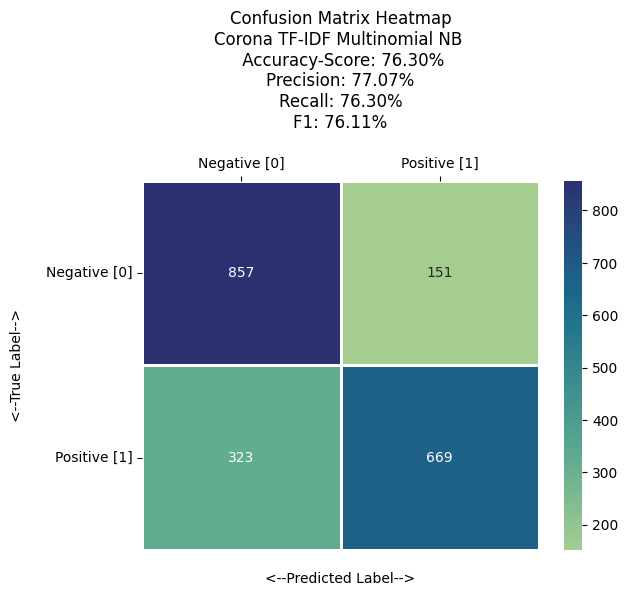

In [ ]:
from seaborn import heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

## TF-IDF Multinomial NB Data
data = [X_train, X_test, Y_train, Y_test]

y_prediction_cm_1 = Y_pred
cm1 = confusion_matrix(data[3], y_prediction_cm_1)

## Accuracy Per Matrix is under each Graph
# Creating a heatmap visualization of the confusion matrix.
ax = sns.heatmap(cm1,
                annot=True,
                fmt='d',
                cmap='crest',
                linewidth=1,
                xticklabels=['Negative [0]', 'Positive [1]'],
                yticklabels=['Negative [0]', 'Positive [1]'])

## Configuring Orientation of labels
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


accuracy_cm1 = np.sum(np.diag(cm1)) / np.sum(cm1)

# Precision, Recall, and F1 Score Metrics
precision_cm1 = precision_score(data[3],
                                y_prediction_cm_1,
                                average='weighted',
                                zero_division=0)


recall_cm1 = recall_score(data[3], y_prediction_cm_1, average='weighted')
f1_cm1 = f1_score(data[3], y_prediction_cm_1, average='weighted')


plt.title(f"Confusion Matrix Heatmap\nCorona TF-IDF Multinomial NB \
\n Accuracy-Score: {accuracy_cm1*100:.2f}%\nPrecision: {precision_cm1*100:.2f}%\n\
Recall: {recall_cm1*100:.2f}%\nF1: {f1_cm1*100:.2f}%\n")
plt.ylabel('<--True Label-->\n')
plt.xlabel('\n<--Predicted Label-->')

plt.show()

## The Heatmap is flipped, but you are absolutely allowed to do so since our
## diagonal is correct with TP and TN

# 00 --> TN
# 01 --> FP
# 11 --> TP
# 10 --> FN

## Triage Dataset

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import re

# Triage Train CSV
triage_train = pd.read_csv ('https://raw.githubusercontent.com/cs124/pa2-naive-bayes/refs/heads/main/data/triage/train.csv', sep='|', names=['Text', 'Label'])

# Triage Test/Dev CSV
triage_dev = pd.read_csv('https://raw.githubusercontent.com/cs124/pa2-naive-bayes/refs/heads/main/data/triage/dev.csv', sep='|', names=['Text', 'Label'])

### TF-IDF & Count Vectorizer NB

In [ ]:
label = triage_dev['Label'].groupby(triage_dev['Label'])
label.count()

,Label
Label,
0,1525
1,1048
Label,1


In [ ]:
from sklearn.model_selection import train_test_split
triage_dev['Text'] = triage_dev['Text'].fillna('')
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(
                                                            triage_dev['Text'],
                                                            triage_dev['Label'],
                                                            test_size=0.2,
                                                            random_state=42
                                                           )



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#TF-IDF Vectorizer Processing
vectorize = TfidfVectorizer()
count_vectorize = CountVectorizer()
X_train_tfidf = vectorize.fit_transform(X_train_3).toarray()
X_test_tfidf = vectorize.transform(X_test_3).toarray()

#Count Vectorizer Processing
X_train_count = count_vectorize.fit_transform(X_train_3).toarray()
X_test_count = count_vectorize.transform(X_test_3).toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Second Bayes Models
clf_TF = MultinomialNB()
clf_TF.fit(X_train_tfidf, Y_train_3)

#Test Results for TF-IDF
Y_pred_TF = clf_TF.predict(X_test_tfidf)

In [ ]:
clf_count = MultinomialNB()
clf_count.fit(X_train_count, Y_train_3)

#Test Results for Count
y_pred_count = clf_count.predict(X_test_count)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Classification Report for TF Bayes Model
print(classification_report(Y_test_3,
                            Y_pred_TF,
                            digits=4,
                            target_names=['No aid',
                                          'Aid']))

              precision    recall  f1-score   support

      No aid     0.6753    0.8792    0.7638       298
         Aid     0.7165    0.4194    0.5291       217

    accuracy                         0.6854       515
   macro avg     0.6959    0.6493    0.6465       515
weighted avg     0.6927    0.6854    0.6649       515



In [ ]:
#Classification Report for Count Bayes Model
print(classification_report(Y_test_3,
                            y_pred_count,
                            digits=4,
                            target_names=['No aid',
                                          'Aid']))

              precision    recall  f1-score   support

      No aid     0.7819    0.6376    0.7024       298
         Aid     0.6029    0.7558    0.6708       217

    accuracy                         0.6874       515
   macro avg     0.6924    0.6967    0.6866       515
weighted avg     0.7065    0.6874    0.6891       515



### Decision Tree TF-IDF

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_3 = DecisionTreeClassifier(random_state = 100, max_depth=3, min_samples_leaf=2)


dtc_3.fit(X_train_tfidf, Y_train_3)
y_pred_dtc_3 = dtc_3.predict(X_test_tfidf)

In [ ]:
class_report_DT_3 = classification_report(Y_test_3,
                                          y_pred_dtc_3,
                                          digits=4,
                                          target_names=['No aid',
                                                        'Aid'])

print(class_report_DT_3)



              precision    recall  f1-score   support

      No aid     0.6490    0.9430    0.7688       298
         Aid     0.7927    0.2995    0.4348       217

    accuracy                         0.6718       515
   macro avg     0.7208    0.6212    0.6018       515
weighted avg     0.7095    0.6718    0.6281       515



### Decision Tree Count

In [ ]:
dtc_4 = DecisionTreeClassifier(random_state = 100, max_depth=3, min_samples_leaf=2)
dtc_4.fit(X_train_count, Y_train_3)
y_pred_dtc_4 = dtc_4.predict(X_test_count)

In [ ]:
class_report_DT_4 = classification_report(Y_test_3,
                                          y_pred_dtc_4,
                                          digits=4,
                                          target_names=['No aid',
                                                        'Aid'])

print(class_report_DT_4)

              precision    recall  f1-score   support

      No aid     0.6505    0.9430    0.7699       298
         Aid     0.7952    0.3041    0.4400       217

    accuracy                         0.6738       515
   macro avg     0.7228    0.6236    0.6049       515
weighted avg     0.7114    0.6738    0.6309       515



### Triage Confusion Matrix w/ Heatmapping

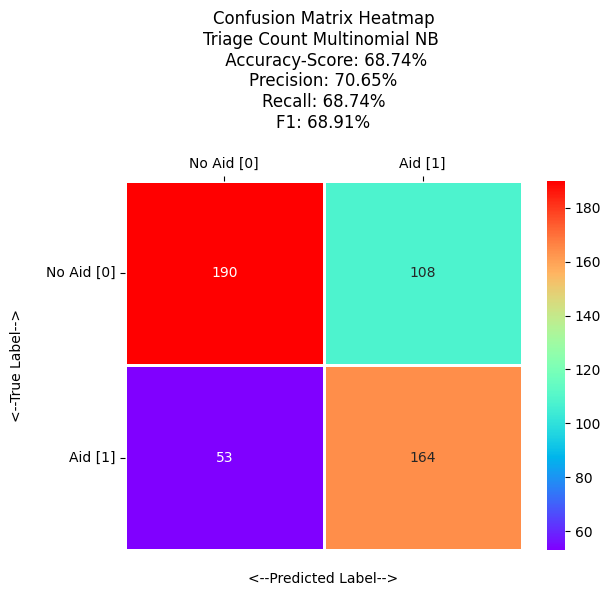

In [ ]:
from seaborn import heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

## Count Multinomial NB Data
data = [X_train_3, X_test_3, Y_train_3, Y_test_3]

y_prediction_cm_2 = y_pred_count
cm2 = confusion_matrix(data[3], y_prediction_cm_2)

## Accuracy Per Matrix is under each Graph
# Creating a heatmap visualization of the confusion matrix.
ax = sns.heatmap(cm2,
                annot=True,
                fmt='d',
                cmap='rainbow',
                linewidth=1,
                xticklabels=['No Aid [0]', 'Aid [1]'],
                yticklabels=['No Aid [0]', 'Aid [1]'])

## Configuring Orientation of labels
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


accuracy_cm2 = np.sum(np.diag(cm2)) / np.sum(cm2)

# Precision, Recall, and F1 Score Metrics
precision_cm2 = precision_score(data[3],
                                y_prediction_cm_2,
                                average='weighted',
                                zero_division=0)


recall_cm2 = recall_score(data[3], y_prediction_cm_2, average='weighted')
f1_cm2 = f1_score(data[3], y_prediction_cm_2, average='weighted')


plt.title(f"Confusion Matrix Heatmap\nTriage Count Multinomial NB \
\n Accuracy-Score: {accuracy_cm2*100:.2f}%\nPrecision: {precision_cm2*100:.2f}%\n\
Recall: {recall_cm2*100:.2f}%\nF1: {f1_cm2*100:.2f}%\n")
plt.ylabel('<--True Label-->\n')
plt.xlabel('\n<--Predicted Label-->')

plt.show()


# **Project 1 Initial Evaluation**

## Coronavirus Dataset

In [ ]:
import pandas as pd
import numpy as np

## When needed
import re

## GitHub Raw files.

# Corona Train CSV File
corona_train = pd.read_csv('https://raw.githubusercontent.com/cs124/pa2-naive-bayes/refs/heads/main/data/coronavirus/train.csv')

# Corona Test CSV File
corona_test = pd.read_csv('https://raw.githubusercontent.com/cs124/pa2-naive-bayes/refs/heads/main/data/coronavirus/dev.csv')

In [ ]:
# Initial mess-around with the data

## Train dataset has 80k records
print(f'{corona_train.info()}\n---Corona Train Information Above---\n\n')

## Test dataset has 10k records
print(f'{corona_test.info()}\n---Corona Test/Dev Information Above---')

In [ ]:
# Testing splits between positive and negative categories for TRAIN dataset.
## 0's indicate negative comments
## 1's indicate positive comments
negative_train = [i for i in corona_train['Text|Label'] if i.endswith('|0')]
positive_train = [i for i in corona_train['Text|Label'] if i.endswith('|1')]

## Convert to dataframes to check how many records for each specific class label
# This Allows you to rename the column
# Mapping Binary values here for classification.
neg_train_DF = pd.DataFrame({0: negative_train}).reset_index(drop=True)
pos_train_DF = pd.DataFrame({1: positive_train}).reset_index(drop=True)

In [ ]:
# Testing splits between positive and negative categories for TEST dataset.
## 0's indicate negative comments
## 1's indicate positive comments
negative_test = [i for i in corona_test['Text|Label'] if i.endswith('|0')]
positive_test = [i for i in corona_test['Text|Label'] if i.endswith('|1')]


## Checking how many records are for each specific class label for TEST set.
neg_test_DF = pd.DataFrame({0: negative_test}).reset_index(drop=True)
pos_test_DF = pd.DataFrame({1: positive_test}).reset_index(drop=True)

In [ ]:
## Recombined dataframes through concatenation w/ labeled columns
# Taking 30k from each specific class label for TRAIN set.

## This sets us up for classification and our predictions.

# 2/3 Train
train_set = pd.concat([
                         neg_train_DF[0:14999],
                         pos_train_DF[15000:29999]
                      ], axis=0)

# 1/3 Test
test_set = pd.concat([
                         neg_test_DF[0:10000],
                         pos_test_DF[0:10000]
                      ], axis=1).dropna()

# I want to print the entirety of the Negative Train Column
#train_set.iloc[:, 0]

## Positive Column
#train_set.iloc[:, 1]

## Negative Column
#train_set.iloc[:, 0]
train_set

In [ ]:
train_set['target'] = train_set['target'].map({neg_train_DF: 0, positive_train: 1})

In [ ]:
## Positive TRAIN dataset has 41,163 records
pos_train_DF.info()

In [ ]:
## Negative TRAIN dataset has 38,837 records which when added equal our 80k.
neg_train_DF.info()

In [ ]:
## Positive TEST dataset has 5,037 records
pos_test_DF.info()

In [ ]:
## Negative TEST dataset has 4,963 records, totalling 10k which matches up.
neg_test_DF.info()

In [ ]:
## 81,647 Unique Tokens in our entire TRAIN dataset.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

train_transformation = vectorizer.fit_transform(corona_train['Text|Label'])

train_tokens = len(vectorizer.vocabulary_)
train_tokens



In [ ]:
# 23,035 Unique Tokens in our entire TEST dataset.
test_transformation = vectorizer.fit_transform(corona_test['Text|Label'])

test_tokens = len(vectorizer.vocabulary_)

test_tokens


---
## **Page Break**
---


## Triage Dataset

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import re

# Triage Train CSV
triage_train = pd.read_csv ('https://raw.githubusercontent.com/cs124/pa2-naive-bayes/refs/heads/main/data/triage/train.csv')

# Triage Test/Dev CSV
triage_dev = pd.read_csv('https://raw.githubusercontent.com/cs124/pa2-naive-bayes/refs/heads/main/data/triage/dev.csv')

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-14-f04161c8615c>, line 7)

In [ ]:
# Initial mess-around with the data

## Train dataset has
print(f'{triage_train.info()}\n---Triage Train Information Above---\n\n')

## Test dataset has records
print(f'{triage_dev.info()}\n---triage Test/Dev Information Above---')

In [ ]:
#Splitting aid-related (class aid) and not aid-related (class not) - TRAIN DATASET
# 0's indicate not aid-related text
# 1's indicate aid-related text
class_not_train = [i for i in triage_train['Text|Label'] if i.endswith('|0')]
class_aid_train = [i for i in triage_train['Text|Label'] if i.endswith('|1')]

## Convert to dataframes to check how many records for each specific class label
class_not_train_DF = pd.DataFrame({0: class_not_train}).reset_index(drop=True)
class_aid_train_DF = pd.DataFrame({1: class_aid_train}).reset_index(drop=True)

##class_not_train_DF
class_aid_train_DF

In [ ]:
#Splitting aid-related (class aid) and not aid-related (class not)-TEST/DEV DATA SET
# 0's indicate not aid-related text
# 1's indicate aid-related text
class_not_dev = [i for i in triage_dev['Text|Label'] if i.endswith('|0')]
class_aid_dev = [i for i in triage_dev['Text|Label'] if i.endswith('|1')]

## Convert to dataframes to check how many records for each specific class label
class_not_dev_DF = pd.DataFrame({0: class_not_dev}).reset_index(drop=True)
class_aid_dev_DF = pd.DataFrame({1: class_aid_dev}).reset_index(drop=True)

In [ ]:
## Recombined dataframes through concatenation w/ labeled columns
# Taking 30k from each specific class label for TRAIN dataset.

## This sets us up for classification and our predictions.

# 2/3 Train
train_set = pd.concat([
                         class_not_train_DF[0:5000],
                         class_aid_train_DF[0:5000]
                      ], axis=1)

# 1/3 Test
dev_set = pd.concat([
                         class_not_dev_DF[0: 1500],
                         class_aid_dev_DF[0: 1500]
                      ], axis=1).dropna()


# I want to print the entirety of the Not aid related Train Column
#train_set.iloc[:, 0]

## Positive Column
#train_set.iloc[:, 1]

## Negative Column
#train_set.iloc[:, 0]

train_set




In [ ]:
# Aid-related TRAIN dataset has 8685 records
class_aid_train_DF.info()

In [ ]:
# Not aid-related TRAIN dataset has 12361 records
class_not_train_DF.info()

In [ ]:
# Aid-related TEST/DEV data set has 1048 records
class_aid_dev_DF.info()

In [ ]:
# Not aid-related TEST/DEV data set has 1525 records
class_not_dev_DF.info()

In [ ]:
# 31211 unique tokens in TRAIN dataset
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

train_transformation = vectorizer.fit_transform(triage_train['Text|Label'])

train_tokens = len(vectorizer.vocabulary_)
train_tokens


In [ ]:
# 10145 unique tokens in TEST/DEV dataset
dev_transformation = vectorizer.fit_transform(triage_dev['Text|Label'])

dev_tokens = len(vectorizer.vocabulary_)

dev_tokens